In [10]:
# pip install kagglehub

import numpy as np
import pandas as pd

df = pd.read_csv("../Dataset/dataset_phishing.csv")

In [11]:
# Exploracion de datos
# Para saber las columnas del dataset
print(list(df.columns))

# Para saber si el dataset esta balanceado
print("- - - - - - - BALANCEO - - - - - - -")
print(df["status"].value_counts())

# Obtener tipos de datos
tipos_de_datos = df.dtypes.value_counts()

# Mostrar tipos de datos con nombres de columnas
print("- - - - - - - TIPOS DE DATOS - - - - - - -")
print(tipos_de_datos)

# Buscando valores nulls
print("- - - - - - - VALORES NULLS - - - - - - -")
nulos = df.isnull()
print(nulos)

nulos_por_columna = df.isnull().sum()
print(list(nulos_por_columna))


['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'rat

In [12]:
# Convirtiendo Columna status a numerica
df["status"] = df["status"].map({"phishing": 1, "legitimate": 0})


# Columna innecesaria porque ya se tiene su longitud
dfProcessed = df.drop('url', axis=1)

print(list(dfProcessed.columns))
nulos_por_columna = df.isnull().sum()
print(list(nulos_por_columna))


['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intR

In [13]:

# Este codigo lo dejo aqui porque fue el primer intento del KNN y se tardo demadiado, lo decidi optimizar
# def euclidean(x, y):
#     return np.sqrt(np.sum((x - y) ** 2))

# def Knn(x_train, y_train, x_test, k):
#     y_pred = []
#     for i in range(x_test.shape[0]):
#         distances = []
#         for j in range(x_train.shape[0]):
#             distances.append(euclidean(x_test.iloc[i], x_train.iloc[j]))
#         distances = np.array(distances)
#         k_nearest = np.argsort(distances)[:k]
#         k_nearest_labels = y_train.iloc[k_nearest]
#         y_pred.append(k_nearest_labels.value_counts().idxmax())
#     return y_pred

def Knn_optimized(x_train, y_train, x_test, k):
    y_pred = []
    x_train = x_train.to_numpy() 
    x_test = x_test.to_numpy()

    for x in x_test:
        # Calcular la distancia euclidiana
        distances = np.sqrt(((x_train - x) ** 2).sum(axis=1))

        k_nearest = np.argpartition(distances, k)[:k]
        k_nearest_labels = y_train.iloc[k_nearest]
        y_pred.append(k_nearest_labels.value_counts().idxmax())
    
    return y_pred

# Seleccionar 80% de los datos para entrenamiento
train = dfProcessed.sample(frac=0.8, random_state=42)

# # Usar el resto (20%) para prueba
test = dfProcessed.drop(train.index)

# Train
train_y = train.pop('status')
train_x = train

# Test
test_y = test.pop('status')
test_x = test

y_pred = Knn_optimized(train_x, train_y, test_x, 3)
# print(res)


In [15]:

df_results = pd.DataFrame({'Real': test_y, 'Predicho': y_pred})

y_pred = np.array(y_pred)

TP = np.sum((test_y == 1) & (y_pred == 1))
TN = np.sum((test_y == 0) & (y_pred == 0))
FP = np.sum((test_y == 0) & (y_pred == 1))
FN = np.sum((test_y == 1) & (y_pred == 0))

accuracy = (TP + TN) / len(test_y) if len(test_y) > 0 else 0
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

print("Accuracy (Exactitud):", accuracy)
print("Precision (Precisión):", precision)
print("Recall (Sensibilidad):", recall)

Accuracy (Exactitud): 0.8429571303587051
Precision (Precisión): 0.8177257525083612
Recall (Sensibilidad): 0.8739946380697051


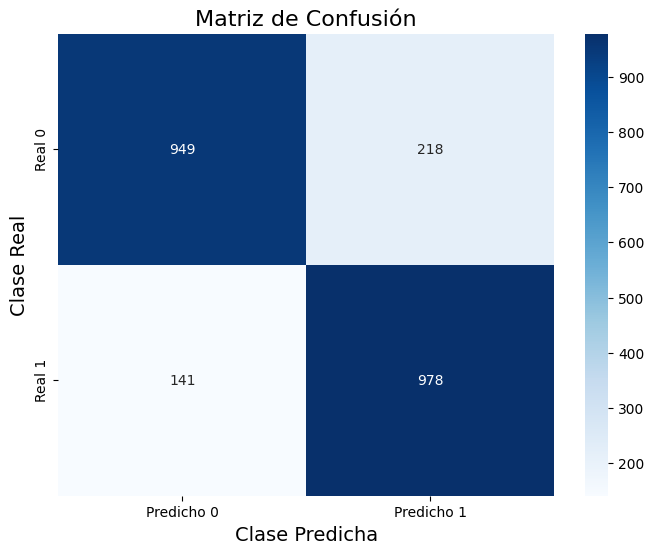

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Valores de la matriz de confusión
conf_matrix = np.array([[TN, FP],  # Primera fila: Verdaderos negativos, Falsos positivos
                        [FN, TP]])  # Segunda fila: Falsos negativos, Verdaderos positivos

# Crear la gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicho 0", "Predicho 1"], yticklabels=["Real 0", "Real 1"])

# Personalizar
plt.title("Matriz de Confusión", fontsize=16)
plt.xlabel("Clase Predicha", fontsize=14)
plt.ylabel("Clase Real", fontsize=14)
plt.show()

In [32]:
df = pd.read_csv("../Dataset/dataset_phishing.csv")

# Convirtiendo Columna status a numerica
df["status"] = df["status"].map({"phishing": 1, "legitimate": 0})


# Columna innecesaria porque ya se tiene su longitud
dfProcessed = df.drop('url', axis=1)

print(list(dfProcessed.columns))
nulos_por_columna = df.isnull().sum()
print(list(nulos_por_columna))

['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intR

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt


y = dfProcessed.pop("status") 
X = dfProcessed


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy (Exactitud):", accuracy)
print("Precision (Precisión):", precision)
print("Recall (Sensibilidad):", recall)


Accuracy (Exactitud): 0.836832895888014
Precision (Precisión): 0.8214285714285714
Recall (Sensibilidad): 0.8556244464127547


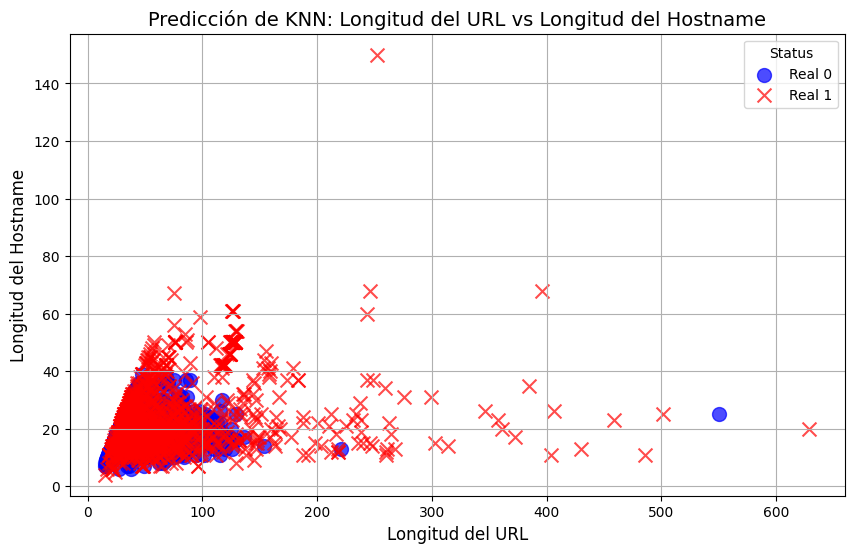

In [34]:
plt.figure(figsize=(10, 6))

for label, marker, color in zip([0, 1], ['o', 'x'], ['blue', 'red']):
    plt.scatter(
        X_test['length_url'][y_test == label],
        X_test['length_hostname'][y_test == label],
        label=f'Real {label}',
        marker=marker,
        color=color,
        s=100,
        alpha=0.7
    )

plt.title("Predicción de KNN: Longitud del URL vs Longitud del Hostname", fontsize=14)
plt.xlabel("Longitud del URL", fontsize=12)
plt.ylabel("Longitud del Hostname", fontsize=12)
plt.legend(title="Status", fontsize=10)
plt.grid(True)
plt.show()